In [ ]:
!git clone https://github.com/SupratimH/learning-data-science/blob/005f2f87b01b36b53179d1c1641b8a6c876358e1/project-playground/bangalore-road-accident-eda.ipynb


Cloning into 'bangalore-road-accident-eda.ipynb'...
fatal: repository 'https://github.com/SupratimH/learning-data-science/blob/005f2f87b01b36b53179d1c1641b8a6c876358e1/project-playground/bangalore-road-accident-eda.ipynb/' not found


# What's happening on roads of Bangalore?

### In this notebook, accident trends on Bangalore (or Bengaluru) roads has been analyzed, based on the data collected by Intel's Collision Detection System (CDS) or Collision Avoidance System (CAS) sensors installed in buses.

#### Disclaimer: The dataset used for this analysis is downloaded from [public dataset in Kaggle](https://www.kaggle.com/apoorvwatsky/bangalore-accident-data/). Basic analysis of the dataset reaveals multiple limitations, including but not limited to:
1. Data is available only for year 2018.
2. In 2018, data for only the months of February, March, April, June and July are present.
3. Over any day, data between 6M and 6PM is only availble. On roads of a city like Bangalore, data beyond 6PM late into the evening is important, which is missing.
4. To summarize, the dataset is not very reliable. Nevertheless, it is a good one to start basic analysis and understand the high level trends of road related incidents in Bangalore.

<div class='pixels-photo'>
  <p>
    <img src='https://drscdn.500px.org/photo/12002497/m%3D900/v2?user_id=794220&webp=true&sig=e67615f98bced0d04266b7d7474f1574f43545571fea1afb0efc4b491df9ca23' alt='Speed by Supratim Haldar on 500px.com'>
  </p>
  <a href='https://500px.com/photo/12002497/speed-by-supratim-haldar' alt='Speed by Supratim Haldar on 500px.com'></a>
</div>

<script type='text/javascript' src='https://500px.com/embed.js'></script>
Image: High speed traffic on NICE Road, Bangalore. 
<br>Copyrighted Source: https://500px.com/photo/12002497/speed-by-supratim-haldar

## Introduction
Traffic on roads of Bangalore is not among the best in cities of India, and a recent study by Ola Cabs have confirmed the same - the average speed of vehicles at peak hours is approx 15.5 KM/hr, which is 3rd from bottom ranking among Indian cities. But there are pockets where traffic moves at high speed as well, parts of city where number of accidents or potential accidents is high, at the same time at other places it is pretty low. Through EDA of this dataset, let us try to unravel some interesting observations about roads of Bangalore.

Before further deep-dive, it is important to understand the types of alarms captured by CDS or CAS. More details is available [here](http://www.munichreamerica.com/site/mram-mobile/get/documents_E1566884367/mram/assetpool.mr_america/PDFs/1_Business_Solutions/Innovation/smart-mobility/Mobileye-FAQ_121217.pdf).
* <b style="color:blue">FORWARD COLLISION WARNINGS (FCW)</b>
<br>A FCW alerts drivers of an imminent rear-end collision with a car, truck, or motorcycle.
* <b style="color:blue">URBAN FORWARD COLLISION WARNINGS (UFCW)</b>
<br>UFCW provides an alert before a possible low-speed collision with the vehicle in front, thus assisting the driver at a low speed in densely heavy traffic. This is usually applicable when driving under approx 30 kmph.
* <b style="color:blue">HEADWAY MONITORING WARNING (HMW)</b>
<br>The headway monitoring warning (HMW) helps drivers maintain a safe following distance from the vehicle ahead of them by providing visual and audible alerts if the distance becomes unsafe. Active above 30 kmph, this sensor generates alarm and displays the amount of time, in seconds, to the vehicle in front when that time becomes 2.5 seconds or less.
* <b style="color:blue">LANE DEPARTURE WARNINGS (LDW)</b>
<br>The LDW provides an alert when the vehicle unintentionally departs from the driving lane without using the turn signals. If the turn signals are used when changing lanes, an alert is not generated. Usually active above 55 kmph, LDW might not work well if lanes are unmarked or poorly marked.
<br>This is further classified into: (a) LDWL, for lane departures towards left lane and (b) LDWR, for the same towards right lane.
* <b style="color:blue">PEDESTRIANS AND CYCLIST DETECTION AND COLLISION WARNING (PCW)</b>
<br>The PCW notifies the driver of a pedestrian or cyclist in the danger zone and alerts drivers of an imminent collision with a pedestrian or cyclist. PCW works well when vehicle is below 50 kmph.
* <b style="color:blue">OVERSPEEDING</b>
<br>Detects and classifies various visible speed limit signs and provides visual indication when the vehicle’s speed exceeds the posted speed limit.

#### Now, let's get started. Following are the steps followed:
1. Read data.
2. Preprocess and cleanup data.
3. Data analysis through visualisation.

## Step 1 : Read data

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from textwrap import wrap

# Set default fontsize and colors for graphs
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Disable scrolling for long output
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

#print(os.listdir('../input'))

<IPython.core.display.Javascript object>

In [ ]:
# Read the input training and test data

input_data_dir = "/content/"
input_data_file = "bangalore-cas-alerts.csv"
input_data_path = os.path.join(input_data_dir, input_data_file)
train_data = pd.read_csv(input_data_path)
train_data.head(10)


,deviceCode_deviceCode,deviceCode_location_latitude,deviceCode_location_longitude,deviceCode_location_wardName,deviceCode_pyld_alarmType,deviceCode_pyld_speed,deviceCode_time_recordedTime_$date
0,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z
1,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z
2,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z
3,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z
4,864504031502210,12.987503,77.740051,Hudi,Overspeed,37,2018-02-01T01:50:11.000Z
5,864504031502210,12.987503,77.740051,Hudi,Overspeed,37,2018-02-01T01:50:11.000Z
6,864504031502210,12.987523,77.736702,Kadugodi,HMW,32,2018-02-01T01:50:50.000Z
7,864504031502210,12.987523,77.736702,Kadugodi,HMW,32,2018-02-01T01:50:50.000Z
8,864504031502210,12.988210,77.731369,Hudi,Overspeed,27,2018-02-01T01:52:26.000Z
9,864504031502210,12.988210,77.731369,Hudi,Overspeed,27,2018-02-01T01:52:26.000Z


In [ ]:
train_data.shape

(207617, 7)

## Step 2 : Pre-process and cleanup data

### A glance at the above data clearly reveals existence of multiple duplicate rows (eg: rows 0 and 1, rows 2 and 3, etc.). The duplicacy exists across all rows, hence let's remove those data.

In [ ]:
# Remove duplicates and check dataset size
train_data.drop_duplicates(inplace=True)
train_data.shape

(152276, 7)

### The size of data reduced from 207617 rows to 152276. Hence, 55341 rows were duplicate, which is pretty high number.

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152276 entries, 0 to 207616
Data columns (total 7 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   deviceCode_deviceCode               152276 non-null  int64  
 1   deviceCode_location_latitude        152276 non-null  float64
 2   deviceCode_location_longitude       152276 non-null  float64
 3   deviceCode_location_wardName        152276 non-null  object 
 4   deviceCode_pyld_alarmType           152276 non-null  object 
 5   deviceCode_pyld_speed               152276 non-null  int64  
 6   deviceCode_time_recordedTime_$date  152276 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 9.3+ MB


### Apparently, there is no missing data, which is good news. We'll see later if any attribute has invalid vales.

In [ ]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
deviceCode_deviceCode,152276.0,8.641311e+14,2.963658e+11,8.620100e+14,8.639770e+14,8.639770e+14,8.645040e+14,8.645040e+14
deviceCode_location_latitude,152276.0,1.297075e+01,2.663822e-02,1.268666e+01,1.295651e+01,1.297310e+01,1.298773e+01,1.307008e+01
deviceCode_location_longitude,152276.0,7.772170e+01,2.972414e-02,7.750818e+01,7.770688e+01,7.772740e+01,7.774370e+01,7.780682e+01
deviceCode_pyld_speed,152276.0,2.214478e+01,1.371225e+01,0.000000e+00,1.100000e+01,2.200000e+01,3.200000e+01,8.300000e+01


### The names of the columns of this dataset are too lengthy for quick analysis. Hence, let us rename the column so shorter and meaningful names, for the purpose of convenience.

In [ ]:
# Renaming the columns
columns={
            "deviceCode_deviceCode" : "deviceCode",
            "deviceCode_location_latitude" : "latitude",
            "deviceCode_location_longitude" : "longitude",
            "deviceCode_location_wardName" : "wardName",
            "deviceCode_pyld_alarmType" : "alarmType",
            "deviceCode_pyld_speed" : "speed",
            "deviceCode_time_recordedTime_$date" : "recordedDateTime"
        }

train_data.rename(columns=columns, inplace=True)
print("Updated column names of train dataframe:", train_data.columns)

Updated column names of train dataframe: Index(['deviceCode', 'latitude', 'longitude', 'wardName', 'alarmType', 'speed',
       'recordedDateTime'],
      dtype='object')


## Step 3 : Data analysis through visualisation

### Latitude and Longitudes
Finding the range of co-ordinates within which the data belongs.

In [ ]:
lat_max = train_data.latitude.max()
lat_min = train_data.latitude.min()
print("Range of latitude:", lat_max, lat_min)

lon_max = train_data.longitude.max()
lon_min = train_data.longitude.min()
print("Range of longitude:", lon_max, lon_min)

Range of latitude: 13.070075035095217 12.686662673950195
Range of longitude: 77.80682373046875 77.5081787109375


### Let's make a simple plot of the co-ordinates, it'll reveal a nice road map of Bangalore!

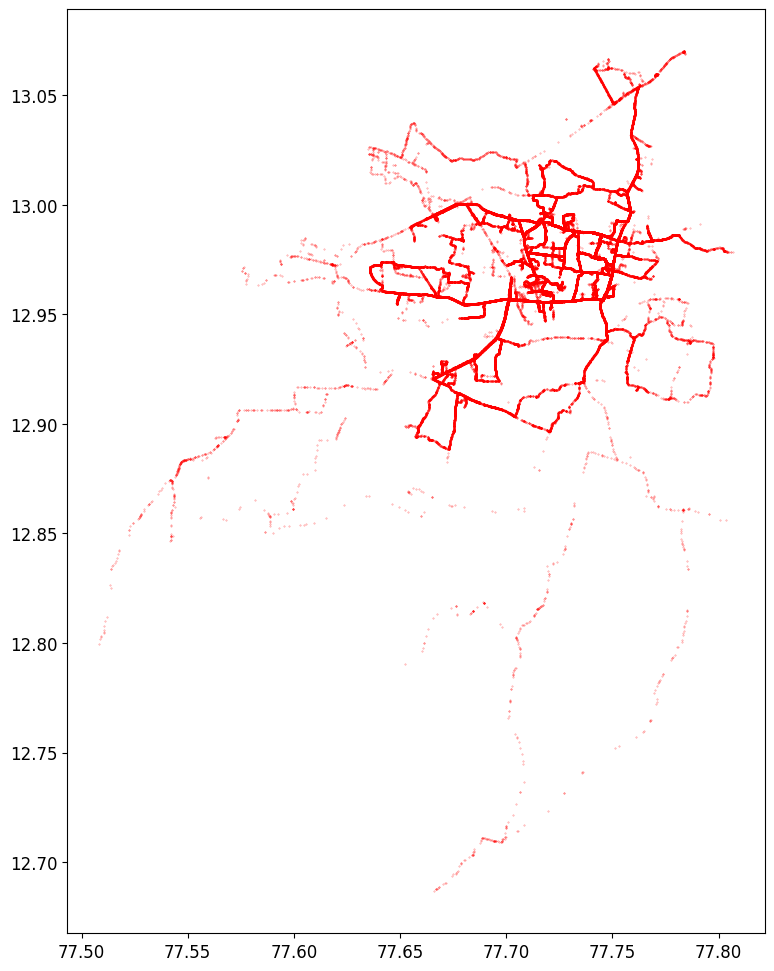

In [ ]:
fig, axes = plt.subplots(figsize=(9,12))
axes.scatter(train_data.longitude, train_data.latitude, s=0.1, alpha=0.5, c='r')
plt.show()

### Before we explore each attribute in detail, let us plot all CDS alarm data on a map of Bangalore/Bengaluru by the co-ordinates specified, to generate a heatmap of locations and speed of vehicles at the time of alarm generation.
### On this heatmap, magnitude of speed is represented by color temperatures - cooler (bluish) plots indicate low speeds whereas warmer (reddish) colors represent higher speeds.

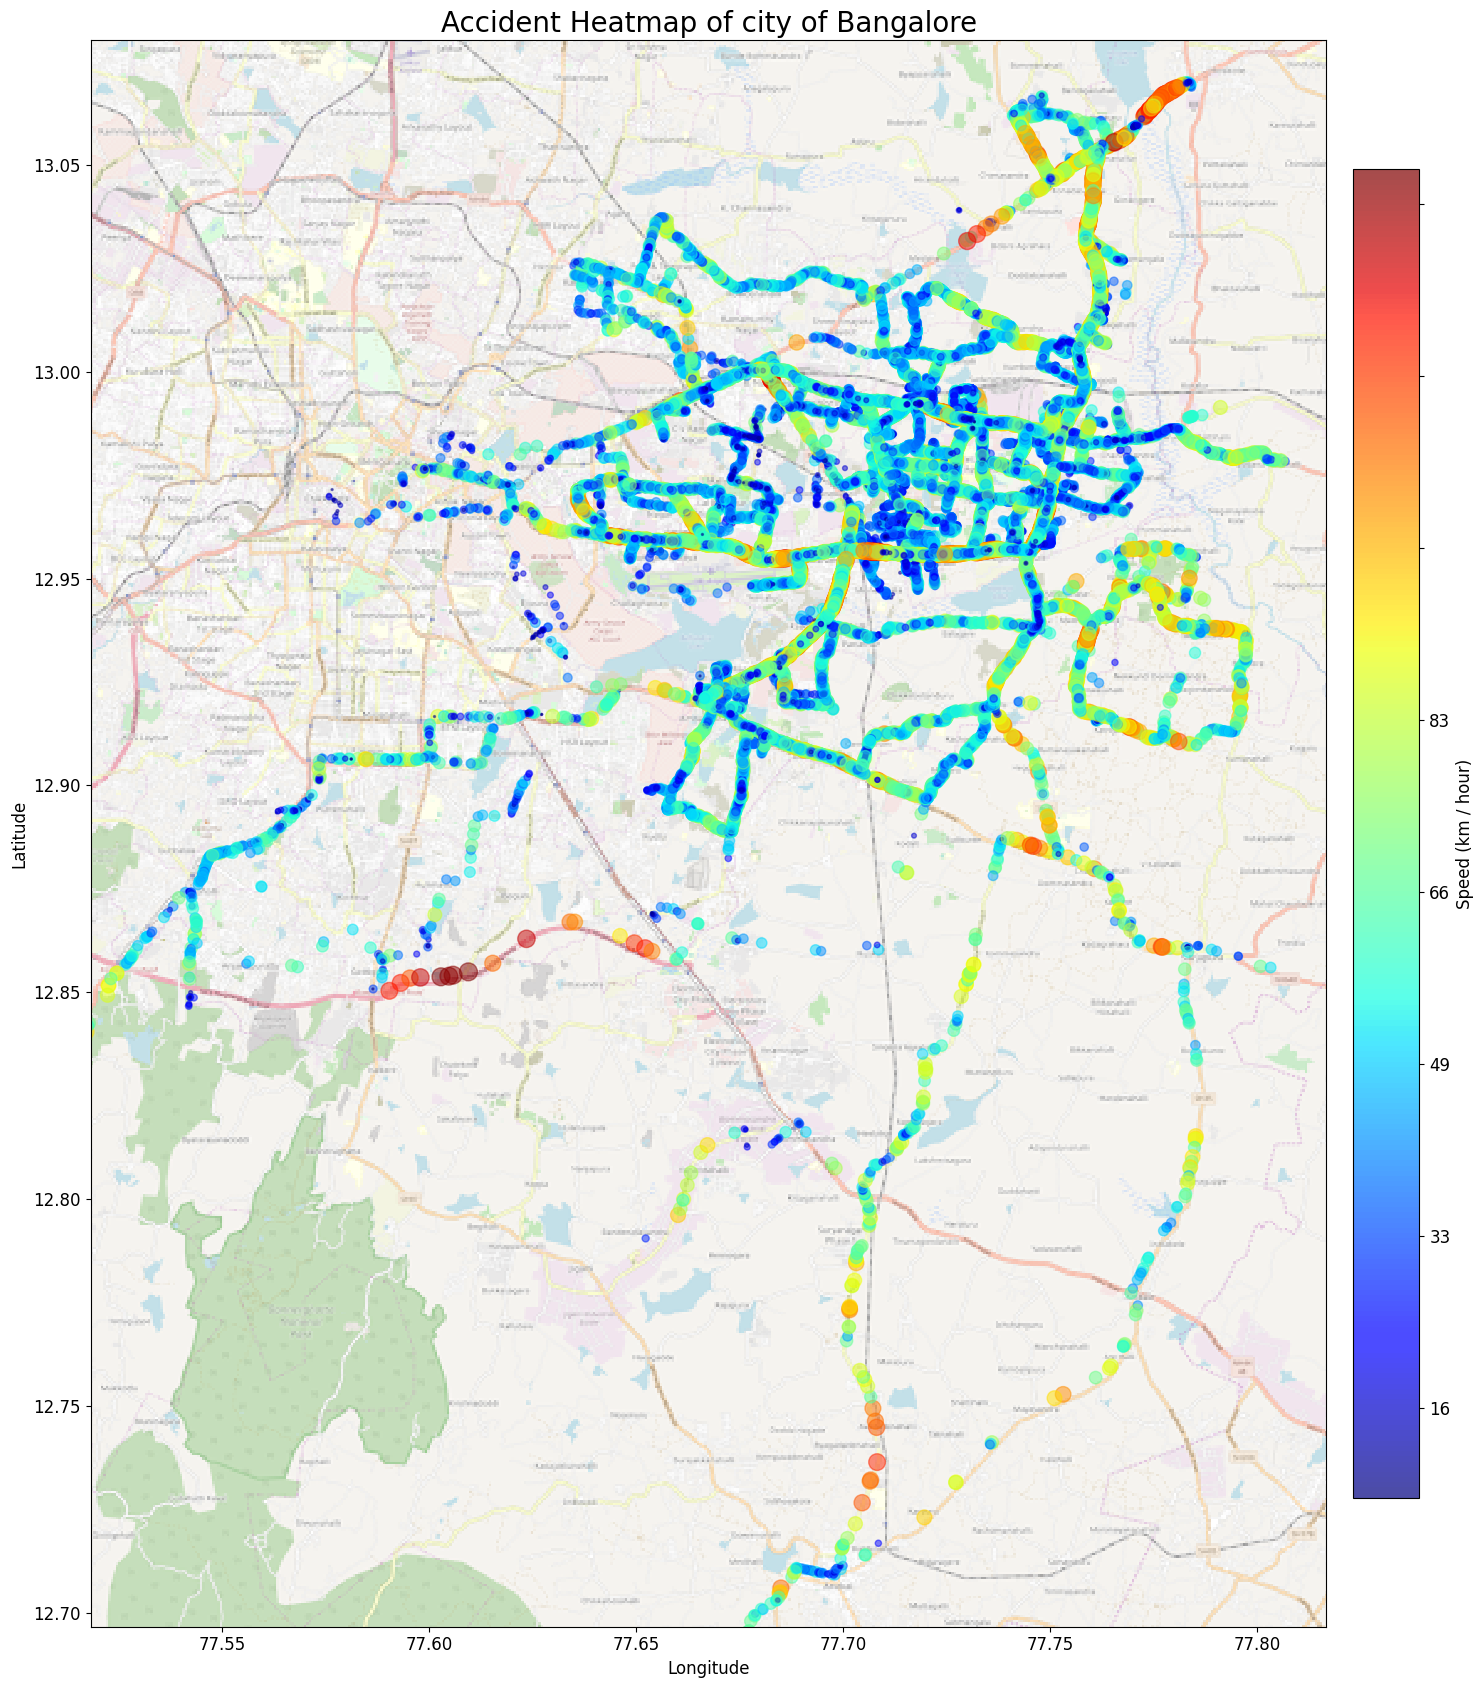

In [17]:
import urllib.request
import io
from PIL import Image
import matplotlib.pyplot as plt

cmap = plt.get_cmap("jet")

# ... rest of the code
bangalore_map_img = 'https://lh3.googleusercontent.com/np8igtYRrHpe7rvJwMzVhbyUZC4Npgx5fRznofRoLVhP6zcdBW9tfD5bC4FbF2ITctElCtBrOn7VH_qEBZMVoPrTFipBdodufT0QU1NeeQVyokMAKtvSHS9BfYMswXodz_IrkiZStg=w500-h664-no'


# Download the image
with urllib.request.urlopen(bangalore_map_img) as url:
   s = url.read()

# Open the image using Pillow and convert to numpy array
img = np.array(Image.open(io.BytesIO(s)))

# Plot the scatter plot with map
axes = train_data.plot(figsize=(15,20), kind='scatter', 
                    x='longitude', y='latitude', 
                    alpha=0.5, marker="o", s=train_data["speed"]*2,
                    c=train_data["speed"], cmap=cmap,
                    colorbar=False)

epsilon = 0.01
bound_box = [lon_min + epsilon, lon_max + epsilon, 
             lat_min + epsilon, lat_max + epsilon]

im = plt.imshow(img, extent=bound_box, zorder=0, 
           cmap=cmap, interpolation='nearest', alpha=0.7)

axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")
axes.set_title('Accident Heatmap of city of Bangalore')

# Colorbar
speed = train_data["speed"].values
tick_values = np.linspace(speed.min(), speed.max(), num=6, dtype=np.int64)

cbar = plt.colorbar(im, fraction=0.05, pad=0.02)
cbar.set_label("Speed (km / hour)")
cbar.ax.set_yticklabels(["%d"%(val) for val in tick_values])

plt.tight_layout()

#output_image = os.path.join(input_data_dir, "output_bangalore_map_traffic")
#plt.savefig(output_image + ".png", format='png', dpi=300)

plt.show()


### For a clearer view of the above image, save and download the image and zoom on the plots to reveal the names of the area and roads. A cross-reference against bigger map of Bangalore indicates the following:
Some of the areas where speed is relatively high - 
* Old Madras Road/Bangalore-Tirupati Highway
* Sarjapur Road
* Some parts of Outer Ring Road
* Anekal Main Road etc.

### We will explore the map by alarm type later to understand which areas are (in)famous for what type of incidents :-)

### Device Code
Code of the sensor device used in the bus. There are 26 different unique device codes present, which indicates the possibility that the entire data might have been collected from sensors of 26 buses.. 

In [18]:
unique_data = train_data['deviceCode'].unique()
print("Number of unique devices used in buses =", len(unique_data))

Number of unique devices used in buses = 26


### Ward Name
Name of the ward in which the alarm was generated.

In [19]:
# Capitalize ward name
train_data['wardName'] = train_data['wardName'].str.capitalize()
print("Total number of wards in CDS dataset:", len(train_data['wardName'].unique()))

Total number of wards in CDS dataset: 49


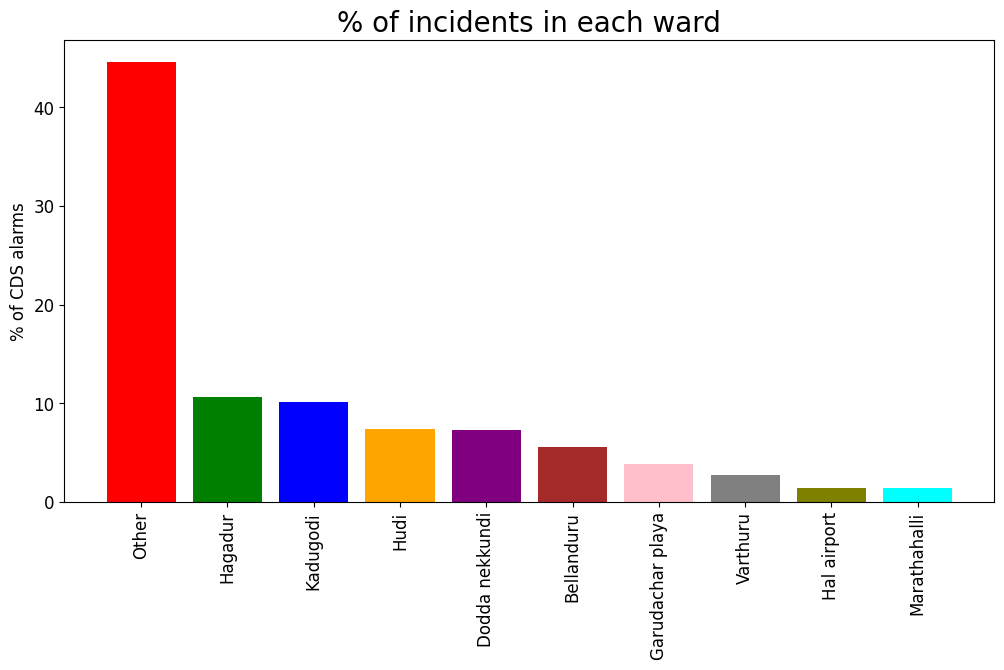

In [20]:
fig, axes = plt.subplots(figsize=(12,6))
data = train_data['wardName'].value_counts(normalize=True).sort_values(ascending=False)
data = data.head(10)
axes.bar(data.index, data*100, color=my_colors)
axes.set_ylabel("% of CDS alarms")
axes.set_xticklabels(data.index, rotation=90)
axes.set_title("% of incidents in each ward")
plt.show()